#### Trisa Nguyen
#### October 17, 2022

# Final Project Part III

## Import Python Libraries

In [1]:
# Basic libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# For timeseries Recurrent neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [3]:
# Keras: TimeseriesGenerator

#This class produces time series batches used on training/testing the model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Keras: MinMaxScaler
#This class is use to preprocess (scale) the data
from sklearn.preprocessing import MinMaxScaler

## Generate Data

In [4]:
# Create a simple sine wave using Numpy

x=np.linspace(0,32,1024)
y=np.sin(x)

In [5]:
x

array([0.00000000e+00, 3.12805474e-02, 6.25610948e-02, ...,
       3.19374389e+01, 3.19687195e+01, 3.20000000e+01])

In [6]:
y

array([0.        , 0.03127545, 0.06252029, ..., 0.49819203, 0.52506622,
       0.55142668])

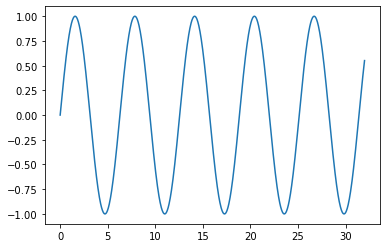

In [7]:
plt.plot(x, y)

In [8]:
# Load the data into pandas dataframe
# Index: x
# Data: y
# Column label: sine

df = pd.DataFrame(data=y, index=x, columns=["Sine"])

In [9]:
df.head(5)

,Sine
0.000000,0.000000
0.031281,0.031275
0.062561,0.062520
0.093842,0.093704
0.125122,0.124796


In [10]:
# Check length of dataframe

len(df)

1024

## Split Data into Train and Test

In [11]:
# Set percentage of data used for testing

test_percent = 0.2

In [12]:
# Number of data points reserved for testing the model
# 20% of the original dataset

len(df)*test_percent

204.8

In [13]:
# Need to find the length (number of data points) of the testing dataset
# It has been found (above) that around 205 data points are used for testing

test_length = np.round(len(df)*test_percent)

In [14]:
test_length

205.0

In [15]:
# The testing data set starts at this index
# Index starting with 0

test_start_index = int(len(df) - test_length)

In [16]:
test_start_index

819

In [17]:
# Create separate training / testing datasets

# Training dataset: All the indicies from start to test_start_index
# excluding test_start_index
data_train = df.iloc[:test_start_index]

# Test dataset: All the indicies from the test_start_index to the end of the dataframe
# including test_start_index
data_test = df.iloc[test_start_index:]

In [18]:
data_train.head(5)

,Sine
0.000000,0.000000
0.031281,0.031275
0.062561,0.062520
0.093842,0.093704
0.125122,0.124796


In [19]:
data_test.head(5)

,Sine
25.618768,0.467117
25.650049,0.494542
25.681329,0.521483
25.712610,0.547914
25.743891,0.573809


## Normalize Data (Scale it into range [0,1])

In [20]:
# Create a MinMaxScaler to normalize the data
scaler = MinMaxScaler()

In [21]:
# IGNORE the warning: Just converting the data to floats
# ONLY scale the TRAINING data; DO NOT scale the testing data

# Train the scaler to perform the normalization
scaler.fit(data_train)

MinMaxScaler()

In [22]:
# Normalize the training dataset
normalized_train = scaler.transform(data_train)

# Normalize the testing dataset
normalized_test = scaler.transform(data_test)

## Create TimeseriesGenerator Instance

In [23]:
# TimeseriesGenerator: Generate time series batches for training/testing

# Set the length of the input sequence
# i.e the number of time series steps that are used to predict the future one
# Use 50 historical data points to predict the next one
length = 50

# batch_size: Number of time series samples in each batch
# One sample: each sample is a time series input sequence
# Only one sample in each batch
batch_size=1

# Create a TimeSeriesGenerator for training: train_tsGenerator
# This time series generator produces time series batches used to train the model
# TimeseriesGenerator (inputs dataset, outputs dataset, length, batch_size)

train_tsGenerator50 = TimeseriesGenerator(
    normalized_train, normalized_train, 
    length=length, 
    batch_size=batch_size)


In [24]:
# What does the first batch look like?

X,y = train_tsGenerator50[0]

In [25]:
# Print X.flatten()

X.flatten()

array([0.49999294, 0.5156309 , 0.53125357, 0.54684565, 0.56239189,
       0.57787708, 0.59328606, 0.60860378, 0.62381522, 0.63890552,
       0.65385991, 0.66866375, 0.68330257, 0.69776204, 0.71202802,
       0.72608654, 0.73992385, 0.75352642, 0.76688093, 0.77997432,
       0.79279378, 0.80532676, 0.81756101, 0.82948455, 0.84108572,
       0.85235316, 0.86327586, 0.87384313, 0.88404462, 0.89387036,
       0.90331073, 0.9123565 , 0.92099882, 0.92922923, 0.93703967,
       0.94442251, 0.95137053, 0.95787692, 0.96393532, 0.9695398 ,
       0.97468488, 0.97936553, 0.98357716, 0.98731565, 0.99057736,
       0.99335908, 0.99565809, 0.99747214, 0.99879947, 0.99963877])

In [26]:
# Print y: what does X predict

y

array([[0.99998922]])

## Build, Train, and Test Model

### Build SimpleRNN Model

In [27]:
# Data set: Onlt one column/attribute: Sine values of index x
# Features: How many features used to train the model: Only one
n_features = 1

# define model
model = Sequential()

# Add a simple RNN layer: Using SimpleRNN cells
# This layer has 125 neurons: One neuron for each input data point
# NOTES: # time series steps of the input sequence: 50
model.add(SimpleRNN(125, input_shape=(length, n_features)))

# Add a FC (fully-connected) layer for the final prediction
# Only one neuro of the Dense/FC layer
# Output: Predict the next data point of the input sequence: only one value
model.add(Dense(1))

### Compile Model

In [28]:
# Compile the model
# Loss function: MSE (mean squared error)
# NOTES: Why MSE? The data is real values/continuous: A regression problem
# Optimizer: adam

model.compile(optimizer='adam', loss='mse')
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 125)               15875     
                                                                 
 dense (Dense)               (None, 1)                 126       
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


### Train (Fit) Model

In [29]:
# Fit the model
# Use fit_generator(), NOT fit()

model.fit_generator(train_tsGenerator50, epochs=5)

Epoch 1/5


C:\Users\trisa\AppData\Local\Temp\ipykernel_25996\445224677.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_tsGenerator50, epochs=5)


769/769 [==============================] - 3s 3ms/step - loss: 0.0013
Epoch 2/5
769/769 [==============================] - 3s 4ms/step - loss: 0.0011
Epoch 3/5
769/769 [==============================] - 3s 4ms/step - loss: 2.2769e-05
Epoch 4/5
769/769 [==============================] - 3s 4ms/step - loss: 1.1962e-05
Epoch 5/5
769/769 [==============================] - 3s 4ms/step - loss: 7.8917e-05


## Visualize the Model's Performance after Training

<AxesSubplot:>

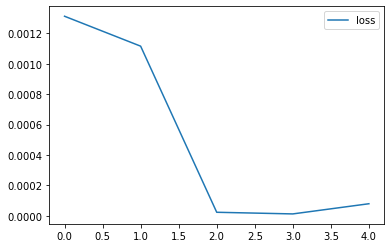

In [30]:
# Load the loss data (model.history.history) into data frame
df_model_loss = pd.DataFrame(model.history.history)

# Visualize the loss data using DataFrame.plot()
df_model_loss.plot()

## Evaluate Model on Test Data

### Sneak peek into test data

In [31]:
# Number of time steps of the input time series

length

50

In [32]:
# Take a sneak peek into the 1st time series batch (50 data points)
# array[-length:]: A sequence of [50th to the last...last]
first_eval_batch = normalized_train[-length:]

first_eval_batch

array([[0.05947937],
       [0.06709305],
       [0.07513027],
       [0.08358318],
       [0.0924435 ],
       [0.10170257],
       [0.11135132],
       [0.12138031],
       [0.13177973],
       [0.14253942],
       [0.15364883],
       [0.1650971 ],
       [0.17687303],
       [0.1889651 ],
       [0.20136148],
       [0.21405004],
       [0.22701836],
       [0.24025376],
       [0.25374328],
       [0.26747374],
       [0.28143168],
       [0.29560347],
       [0.30997523],
       [0.3245329 ],
       [0.33926225],
       [0.35414885],
       [0.36917814],
       [0.38433542],
       [0.39960586],
       [0.41497451],
       [0.43042635],
       [0.44594625],
       [0.46151903],
       [0.47712946],
       [0.49276225],
       [0.50840212],
       [0.52403376],
       [0.53964187],
       [0.5552112 ],
       [0.5707265 ],
       [0.5861726 ],
       [0.60153438],
       [0.61679681],
       [0.63194496],
       [0.64696401],
       [0.66183926],
       [0.67655617],
       [0.691

#### Important Notes:
#### First_eval_batch: Currently is a 2D array 50 x 1 (50 rows, 1 column)
#### It is necessary to reshape it into a 3D array 1 x 50 x 1
#### (1 plane, 50 row, 1 column)
#### ( # samples in a batch, # time series steps, # features)

In [33]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

first_eval_batch

array([[[0.05947937],
        [0.06709305],
        [0.07513027],
        [0.08358318],
        [0.0924435 ],
        [0.10170257],
        [0.11135132],
        [0.12138031],
        [0.13177973],
        [0.14253942],
        [0.15364883],
        [0.1650971 ],
        [0.17687303],
        [0.1889651 ],
        [0.20136148],
        [0.21405004],
        [0.22701836],
        [0.24025376],
        [0.25374328],
        [0.26747374],
        [0.28143168],
        [0.29560347],
        [0.30997523],
        [0.3245329 ],
        [0.33926225],
        [0.35414885],
        [0.36917814],
        [0.38433542],
        [0.39960586],
        [0.41497451],
        [0.43042635],
        [0.44594625],
        [0.46151903],
        [0.47712946],
        [0.49276225],
        [0.50840212],
        [0.52403376],
        [0.53964187],
        [0.5552112 ],
        [0.5707265 ],
        [0.5861726 ],
        [0.60153438],
        [0.61679681],
        [0.63194496],
        [0.64696401],
        [0

### Evaluate Model

In [34]:
# Declare a list to store all the predictions
# Similar to: test_predictions = list();
test_predictions = []

# Get the first time series batch for testing
# The 1ist batch: The 1st time series input sequence
# = the last 50 data points of the train data set
first_eval_batch = normalized_train[-length:]

# Reshape the batch into 3D array: #samples/batch x length x #features
current_batch = first_eval_batch.reshape((1, length, n_features))

#Run a FOR LOOP to make a prediction for each batch
for i in range(len(data_test)):
    
    # Get the value of the first element: The prediction
    current_pred = model.predict(current_batch)[0]
    
    # Store prediction into the list of predictions
    test_predictions.append(current_pred)
    
    # Generate a new batch to prepare for the next iteration of testing
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


1/1 [==============================] - 0s 18ms/step


In [35]:
# Convert the scaled result back to the real values
true_predictions = scaler.inverse_transform(test_predictions)

true_predictions

array([[ 0.46585751],
       [ 0.49238212],
       [ 0.51792196],
       [ 0.54271949],
       [ 0.56667232],
       [ 0.5899918 ],
       [ 0.61227799],
       [ 0.63379016],
       [ 0.65434427],
       [ 0.6739732 ],
       [ 0.69262953],
       [ 0.71035794],
       [ 0.72717883],
       [ 0.74305499],
       [ 0.75808872],
       [ 0.77206997],
       [ 0.78512306],
       [ 0.79724276],
       [ 0.80844421],
       [ 0.81875971],
       [ 0.8281039 ],
       [ 0.83656417],
       [ 0.84412169],
       [ 0.85077465],
       [ 0.85656539],
       [ 0.8614746 ],
       [ 0.86555197],
       [ 0.86873075],
       [ 0.87112229],
       [ 0.87265327],
       [ 0.87342276],
       [ 0.87331726],
       [ 0.87250844],
       [ 0.87086087],
       [ 0.86849115],
       [ 0.86535349],
       [ 0.86149748],
       [ 0.85690502],
       [ 0.85161602],
       [ 0.84561047],
       [ 0.83893211],
       [ 0.83158118],
       [ 0.82356174],
       [ 0.81489429],
       [ 0.80557954],
       [ 0

In [36]:
first_eval_batch.shape

(50, 1)

In [37]:
data_test

,Sine
25.618768,0.467117
25.650049,0.494542
25.681329,0.521483
25.712610,0.547914
25.743891,0.573809
...,...
31.874878,0.443008
31.906158,0.470830
31.937439,0.498192
31.968719,0.525066


In [38]:
# Notes: A warning will be displayed and that is okay.

# Copy the true values of predictions into the dataframe of the original test data
# Add it as another column/attribute 

data_test['Predictions'] = true_predictions

C:\Users\trisa\AppData\Local\Temp\ipykernel_25996\1287699972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predictions'] = true_predictions


In [39]:
# Updated data_test
data_test

,Sine,Predictions
25.618768,0.467117,0.465858
25.650049,0.494542,0.492382
25.681329,0.521483,0.517922
25.712610,0.547914,0.542719
25.743891,0.573809,0.566672
...,...,...
31.874878,0.443008,0.323784
31.906158,0.470830,0.351822
31.937439,0.498192,0.379347
31.968719,0.525066,0.406322


<AxesSubplot:>

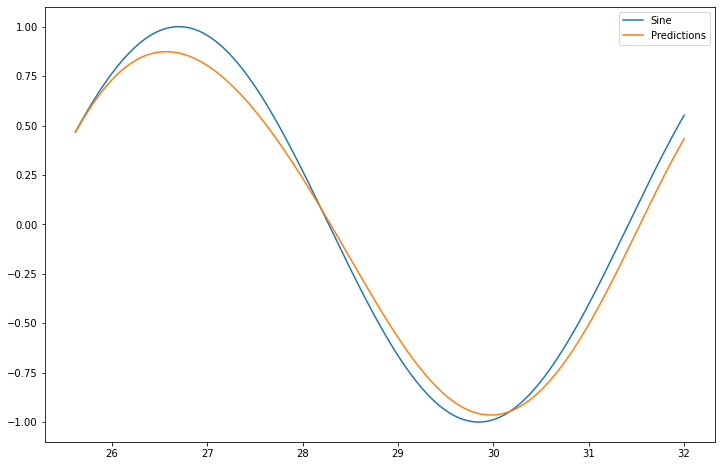

In [40]:
# Visualize the data of the updated test data
# Compare the predicted sine wave against the original sine wave

data_test.plot(figsize=(12,8))